In [10]:
import tensorflow as tf
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

def crop_brain_contour(image, plot=False):
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions and dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in the thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')

        plt.show()

    return new_image

# Corrected model path
model_path ='/content/cnn-parameters-improvement-23-0.91.model' #r"C:\Users\Hritika\Downloads\cnn-parameters-improvement-23-0.91.model"

# Load the model
try:
    best_model = load_model(model_path)
except Exception as e:
    print(f"Error loading the model: {e}")

# Function to preprocess and predict
def model_predict(img_path, model):
    img = cv2.imread(img_path)
    img = crop_brain_contour(img, plot=True)
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_CUBIC)
    img = img / 255.0
    x = np.expand_dims(img, axis=0)
    classes = ['No Tumor', 'Tumor Detected']
    preds = classes[int((model.predict(x)[0] > 0.5)[0])]
    return preds


Loading model from: /content/cnn-parameters-improvement-23-0.91.model
Model loaded successfully.
Predicting for image: /content/image(2).jpg
Cropping brain contour from image...
Cropping brain contour...


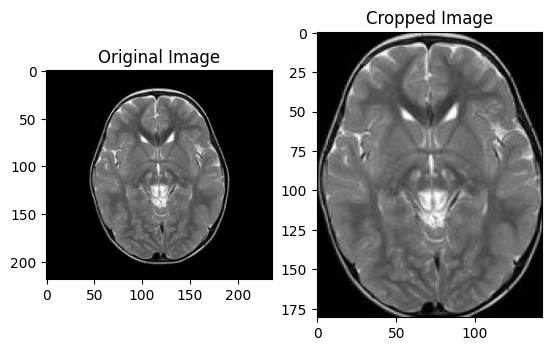

Brain contour cropped.
Image cropped.
Resizing image...
Image resized.
Normalizing image...
Image normalized.
Expanding dimensions for prediction...
Dimensions expanded.
Predicting with model...
1/1 [==============================] - 0s 118ms/step
Predicted probabilities: [0.99368256]
Prediction with threshold 0.1: No Tumor
Prediction with threshold 0.2: No Tumor
Prediction with threshold 0.3: No Tumor
Final prediction: No Tumor
Final prediction: No Tumor


In [22]:
import tensorflow as tf
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

%matplotlib inline

def crop_brain_contour(image, plot=False):
    # Convert the image to grayscale, and blur it slightly
    print("Cropping brain contour...")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions and dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in the thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # Crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')

        plt.show()

    print("Brain contour cropped.")
    return new_image

# Corrected model path
model_path = '/content/cnn-parameters-improvement-23-0.91.model'

# Load the model
print(f"Loading model from: {model_path}")
try:
    best_model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")

# Function to preprocess and predict
def model_predict(img_path, model):
    print(f"Predicting for image: {img_path}")
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image from path: {img_path}")
        return None

    print("Cropping brain contour from image...")
    img = crop_brain_contour(img, plot=True)
    print("Image cropped.")

    print("Resizing image...")
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_CUBIC)
    print("Image resized.")

    print("Normalizing image...")
    img = img / 255.0
    print("Image normalized.")

    print("Expanding dimensions for prediction...")
    x = np.expand_dims(img, axis=0)
    print("Dimensions expanded.")

    print("Predicting with model...")
    predicted_probabilities = model.predict(x)[0]
    print("Predicted probabilities:", predicted_probabilities)

    # Experiment with different thresholds
    thresholds = [0.1, 0.2, 0.3]  # Example thresholds to try
    for threshold in thresholds:
        if predicted_probabilities[0] > threshold:
            preds = 'No Tumor'
        else:
            preds = 'Tumor Detected'

        print(f"Prediction with threshold {threshold}: {preds}")

    # Use the threshold that best fits your data
    final_threshold = 0.2  # Adjust this based on your observations
    if predicted_probabilities[0] > final_threshold:
        final_preds = 'No Tumor'
    else:
        final_preds = 'Tumor Detected'

    print("Final prediction:", final_preds)

    return final_preds

# Example usage:
img_path = '/content/image(2).jpg'
prediction = model_predict(img_path, best_model)
print("Final prediction:", prediction)
